In [240]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Import các thư viện cần thiết
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, make_scorer
import optuna


In [201]:
df = pd.DataFrame()
for file in os.listdir('kol_data_csv_final'):
    if file.endswith('.csv'):
        data = pd.read_csv(f'kol_data_csv_final/{file}')
        df = pd.concat([df, data], ignore_index=True)
df

,text,createTime,createTimeISO,isAd,profileUrl,musicName,musicId,webVideoUrl,duration,diggCount,...,emoji_count,hashtag_count,word_count_no_emoji_hashtag,early_morning,morning,afternoon,evening,late_night,is_weekend,is_pinned
0,Dưỡng da thôi mọi người ơiiii #hnhu2804 #boxst...,2025-06-13 00:19:15,12/06/2025,False,https://www.tiktok.com/@hnhu2804,Slow and comical BGM(1083863),7.200451e+18,https://www.tiktok.com/@hnhu2804/video/7515113...,201,5891,...,0,6,6,1,0,0,0,0,0,False
1,"Dạo này Như đang xài ẻm nha, da căng bóng thíc...",2025-06-12 21:23:57,12/06/2025,False,https://www.tiktok.com/@hnhu2804,Cute,7.136446e+18,https://www.tiktok.com/@hnhu2804/video/7515068...,102,547,...,0,9,12,0,0,0,1,0,0,False
2,Trả lời @Én đang bận ♌️ giữ chuỗi dưỡng da bod...,2025-06-12 00:21:37,11/06/2025,False,https://www.tiktok.com/@hnhu2804,Honobono suspicious comedy comical fagott,6.817135e+18,https://www.tiktok.com/@hnhu2804/video/7514743...,129,7695,...,2,6,17,1,0,0,0,0,0,False
3,Cái kiểu nó vậy á 😇 #hnhu2804 #learnontiktok #...,2025-06-11 12:23:41,11/06/2025,False,https://www.tiktok.com/@hnhu2804,nhạc nền - Vợ a chứ ai?,7.513064e+18,https://www.tiktok.com/@hnhu2804/video/7514558...,27,14500,...,1,4,5,0,0,1,0,0,0,False
4,+1 clip gửi bạn thân giữ chuỗi dưỡng da mùa hè...,2025-06-11 00:26:18,10/06/2025,False,https://www.tiktok.com/@hnhu2804,Slow and comical BGM(1083863),7.200451e+18,https://www.tiktok.com/@hnhu2804/video/7514373...,139,12000,...,1,6,11,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,Một ngày giặt đồ cùng nước giặt xả MaxKleen 💕 ...,2024-01-19 18:49:40,19/01/2024,False,https://www.tiktok.com/@dieplinhcami,nhạc nền - Diệp Linh,7.325775e+18,https://www.tiktok.com/@dieplinhcami/video/732...,60,455,...,1,5,9,0,0,0,1,0,0,False
22747,Quê tui đẹp không các bạn iuuuu\nChào các đồng...,2024-01-13 19:53:19,13/01/2024,False,https://www.tiktok.com/@dieplinhcami,Em Xinh - TikTok Cut,7.306537e+18,https://www.tiktok.com/@dieplinhcami/video/732...,7,1096,...,1,0,14,0,0,0,1,0,1,False
22748,#CapCut Trong năm 2023 các bạn có bao nhiêu lầ...,2024-01-12 10:32:25,12/01/2024,False,https://www.tiktok.com/@dieplinhcami,nhạc nền - Diệp Linh,7.323050e+18,https://www.tiktok.com/@dieplinhcami/video/732...,96,714,...,0,4,12,0,1,0,0,0,0,False
22749,Cái gì tốt thật sự dần sẽ được nhiều người biế...,2024-01-06 09:20:00,06/01/2024,False,https://www.tiktok.com/@dieplinhcami,nhạc nền - Diệp Linh,7.320804e+18,https://www.tiktok.com/@dieplinhcami/video/732...,108,10500,...,1,4,62,0,1,0,0,0,1,False


- text : caption của bài đăng
- creatimeISO : thời gian tạo bài đăng
- isAd : bài đăng có phải là một bài đăng quảng cáo hay là không 
- duration : thời lượng video 
{ 
- diggCount : số lượt tim 
- shareCount : số lượng lượt share 
- playCount : số lượt xem 
- collectionCount : số lượt lưu về 
- commentCount : sô lượt bình luận 
} sử dụng để tạo output 

- hashtags : 
- isSlideShow : bài đăng có phải là bài đăng dạng slide hay không 
- isSponsored : bài đăng có được tài trợ quảng cáo hay không
- kol_username : 
- ttSeller : tài khoản bán hàng tiktok 
- commerceSeller : tài khoản bán hàng tiktok được tiktok gán nhãn 
- is_trending : số lượng video vượt ngưỡng bình thường của KOL
- emoji_count : số lượng emoji trong caption 
- hashtag_count : số lượng hashtag có trong caption
- word_count_no_emoji_hashtag : số lượng từ trong caption không tính emoji và hashtag 
- early_morning : bài đăng đăng vào sáng sớm
- morning : buổi sáng
- afternoon : buổi chiều 
- evening : buổi tối 
- late_night : tối muộn 
- is_weekend : đăng vào cuối tuần 
- is_pinned : bài viết này được pin nổi bật lên đầu. 

In [202]:
df.isnull().sum()

text                            782
createTime                        0
createTimeISO                     0
isAd                              0
profileUrl                        0
musicName                        66
musicId                           0
webVideoUrl                       0
duration                          0
diggCount                         0
shareCount                        0
playCount                         0
collectCount                      0
commentCount                      0
hashtags                       4336
isSlideshow                       0
isSponsored                       0
kol_username                      0
ttSeller                          0
commerceUser                      0
is_trending                       0
emoji_count                       0
hashtag_count                     0
word_count_no_emoji_hashtag       0
early_morning                     0
morning                           0
afternoon                         0
evening                     

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   text                         21969 non-null  object 
 1   createTime                   22751 non-null  object 
 2   createTimeISO                22751 non-null  object 
 3   isAd                         22751 non-null  bool   
 4   profileUrl                   22751 non-null  object 
 5   musicName                    22685 non-null  object 
 6   musicId                      22751 non-null  float64
 7   webVideoUrl                  22751 non-null  object 
 8   duration                     22751 non-null  int64  
 9   diggCount                    22751 non-null  int64  
 10  shareCount                   22751 non-null  int64  
 11  playCount                    22751 non-null  int64  
 12  collectCount                 22751 non-null  int64  
 13  commentCount    

In [204]:
invalid_times = df[df['createTime'].isna()]
print(invalid_times.head())

Empty DataFrame
Columns: [text, createTime, createTimeISO, isAd, profileUrl, musicName, musicId, webVideoUrl, duration, diggCount, shareCount, playCount, collectCount, commentCount, hashtags, isSlideshow, isSponsored, kol_username, ttSeller, commerceUser, is_trending, emoji_count, hashtag_count, word_count_no_emoji_hashtag, early_morning, morning, afternoon, evening, late_night, is_weekend, is_pinned]
Index: []

[0 rows x 31 columns]


In [205]:
# Nếu đã có DataFrame và muốn chuyển đổi cột createTimeISO:
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"], format="%d/%m/%Y", errors="coerce")

# Kiểm tra xem còn NaT (parse lỗi) không
print(df["createTimeISO"].isna().sum())
print(df["createTimeISO"].head())

0
0   2025-06-12
1   2025-06-12
2   2025-06-11
3   2025-06-11
4   2025-06-10
Name: createTimeISO, dtype: datetime64[ns]


In [206]:
df['createMonth'] = pd.to_datetime(df['createTimeISO']).dt.month

Xóa bỏ các hàng có is_pinned = True

In [207]:
df = df[df['is_pinned'] != True].copy()
df = df[df['isAd'] == True].copy()

In [208]:
df = df.drop(columns=['text', 'createTime', 'createTimeISO', 'profileUrl','musicName', 'webVideoUrl', 'hashtags', 'kol_username', 'is_pinned', 'isAd'])

- Xóa bỏ columns  is_pinned = True 

In [209]:
mapping = {
    "early_morning": 0,
    "morning": 1,
    "afternoon": 2,
    "evening": 3,
    "late_night": 4
}

df["time_of_day"] = df.apply(
    lambda row: next(mapping[col] for col in mapping if row[col] == 1),
    axis=1
)

# Xóa cột cũ
df = df.drop(columns=mapping.keys())

print(df)

            musicId  duration  diggCount  shareCount  playCount  collectCount  \
11     7.136446e+18        47        456          17      30200            65   
12     7.136446e+18        83        960          15      71700            93   
22     7.136446e+18        66       1114          20      46400           208   
36     6.925886e+18        47       2179          65     156300           263   
40     6.925886e+18        89       5715          87     282400           581   
...             ...       ...        ...         ...        ...           ...   
22640  7.200479e+18        77       1823          43     100600           171   
22687  7.366468e+18        57        384           7     143800            29   
22706  6.798432e+18        40       1230          23      53100           143   
22723  7.344726e+18        83       1325          32     242700           135   
22750  7.320584e+18        72        486          10      80000            52   

       commentCount  isSlid

In [210]:
df.dtypes

musicId                        float64
duration                         int64
diggCount                        int64
shareCount                       int64
playCount                        int64
collectCount                     int64
commentCount                     int64
isSlideshow                       bool
isSponsored                       bool
ttSeller                          bool
commerceUser                      bool
is_trending                       bool
emoji_count                      int64
hashtag_count                    int64
word_count_no_emoji_hashtag      int64
is_weekend                       int64
createMonth                      int32
time_of_day                      int64
dtype: object

In [211]:
df.isnull().sum()

musicId                        0
duration                       0
diggCount                      0
shareCount                     0
playCount                      0
collectCount                   0
commentCount                   0
isSlideshow                    0
isSponsored                    0
ttSeller                       0
commerceUser                   0
is_trending                    0
emoji_count                    0
hashtag_count                  0
word_count_no_emoji_hashtag    0
is_weekend                     0
createMonth                    0
time_of_day                    0
dtype: int64

In [212]:
df.head()

,musicId,duration,diggCount,shareCount,playCount,collectCount,commentCount,isSlideshow,isSponsored,ttSeller,commerceUser,is_trending,emoji_count,hashtag_count,word_count_no_emoji_hashtag,is_weekend,createMonth,time_of_day
11,7.136446e+18,47,456,17,30200,65,14,False,False,False,False,False,2,7,10,0,6,3
12,7.136446e+18,83,960,15,71700,93,14,False,False,False,False,False,0,7,17,0,6,1
22,7.136446e+18,66,1114,20,46400,208,49,False,False,False,False,False,1,6,10,1,5,3
36,6.925886e+18,47,2179,65,156300,263,48,False,False,False,False,False,0,8,12,1,5,3
40,6.925886e+18,89,5715,87,282400,581,69,False,False,False,False,False,1,10,7,0,5,3


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4985 entries, 11 to 22750
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   musicId                      4985 non-null   float64
 1   duration                     4985 non-null   int64  
 2   isSlideshow                  4985 non-null   bool   
 3   isSponsored                  4985 non-null   bool   
 4   ttSeller                     4985 non-null   bool   
 5   commerceUser                 4985 non-null   bool   
 6   is_trending                  4985 non-null   bool   
 7   emoji_count                  4985 non-null   int64  
 8   hashtag_count                4985 non-null   int64  
 9   word_count_no_emoji_hashtag  4985 non-null   int64  
 10  is_weekend                   4985 non-null   int64  
 11  createMonth                  4985 non-null   int32  
 12  time_of_day                  4985 non-null   int64  
 13  Engagement Rate      

# Tạo output

In [214]:
df['Engagement Rate'] = (df['diggCount']+df['shareCount']+df['commentCount']+df['collectCount']) / df['playCount']
df = df.drop(columns=['collectCount', 'shareCount', 'commentCount', 'diggCount', 'playCount'])

(array([2.534e+03, 1.393e+03, 5.880e+02, 2.490e+02, 1.030e+02, 5.300e+01,
        1.300e+01, 2.400e+01, 8.000e+00, 1.000e+01, 4.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.03145611e-04, 1.81676174e-02, 3.60320893e-02, 5.38965611e-02,
        7.17610329e-02, 8.96255047e-02, 1.07489977e-01, 1.25354448e-01,
        1.43218920e-01, 1.61083392e-01, 1.78947864e-01, 1.96812336e-01,
        2.14676808e-01, 2.32541279e-01, 2.50405751e-01, 2.68270223e-01,
        2.86134695e-01, 3.03999167e-01, 3.21863639e-01, 3.39728110e-01,
        3.57592582e-01, 3.75457054e-01, 3.93321526e-01, 4.11185998e-01,
        4.29050469e-01, 4.46914941e-01, 4.64779413e-01, 4.82643885e-01,
        5.00508357e-01, 5.18372829e-01, 5.36237300e-01]),
 <BarContainer object of 30 artists>)

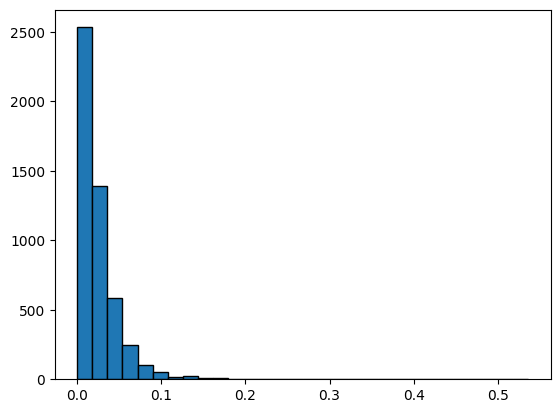

In [215]:
plt.hist(df['Engagement Rate'], bins=30, edgecolor='black')

In [216]:
df['Engagement Rate'].describe()  # Display statistics of the Engagement Rate column

count    4985.000000
mean        0.025023
std         0.025102
min         0.000303
25%         0.008741
50%         0.017857
75%         0.032779
max         0.536237
Name: Engagement Rate, dtype: float64

In [217]:
df.dtypes

musicId                        float64
duration                         int64
isSlideshow                       bool
isSponsored                       bool
ttSeller                          bool
commerceUser                      bool
is_trending                       bool
emoji_count                      int64
hashtag_count                    int64
word_count_no_emoji_hashtag      int64
is_weekend                       int64
createMonth                      int32
time_of_day                      int64
Engagement Rate                float64
dtype: object

In [218]:
df.isnull().sum()

musicId                        0
duration                       0
isSlideshow                    0
isSponsored                    0
ttSeller                       0
commerceUser                   0
is_trending                    0
emoji_count                    0
hashtag_count                  0
word_count_no_emoji_hashtag    0
is_weekend                     0
createMonth                    0
time_of_day                    0
Engagement Rate                0
dtype: int64

# Các độ đo sử dụng 
- MAE : đo lường sai số trung bình tuyệt đối
- MSE : đo lường bình phương trung bình của sai số giữa các giá trị dự đoán so với giá trị thực tế
- MAPE : đo lường sai số phần trăm trung bình giữa giá trị dự đoán so với thực tế. 
- R2 : đo lường tỷ lệ phương sai của biến mục tiêu được mô hình giải thích.
- MAE / mean (Normalized MAE) : chuẩn hóa MAE theo giá trị trung bình của output, thấy được sai sô tương đối so với quy mô của dữ liệu (đặc biệt khi đầu ra output có giá trị nhỏ)

- Ngưỡng MAE/mean(output):
    + Dưới 0.1 (10%): Mô hình có hiệu suất rất tốt, sai số trung bình nhỏ so với giá trị trung bình của output. Phù hợp với các bài toán yêu cầu độ chính xác cao (ví dụ: dự báo giá cổ phiếu, cảm biến kỹ thuật).
    + 0.1–0.3 (10–30%): Hiệu suất trung bình, chấp nhận được trong nhiều bài toán thực tế (ví dụ: dự báo doanh thu, dự đoán tiêu thụ năng lượng).
    + 0.3–0.5 (30–50%): Hiệu suất thấp, mô hình có sai số tương đối lớn so với giá trị trung bình. Có thể cần cải thiện mô hình hoặc kiểm tra dữ liệu (như trong trường hợp của bạn).
    + Trên 0.5 (50%): Mô hình có hiệu suất kém, sai số quá lớn so với quy mô dữ liệu. Cần xem lại dữ liệu, mô hình, hoặc cách xử lý đặc trưng.

# Kiểm tra đa cộng tuyến 
- Ngưỡng VIF phù hợp là: 
    + VIF < 5 : không có đa cộng tuyến đáng kể, chấp nhận được 
    + 5 <= VIF <= 10 : Có dấu hiệu đa cộng tuyến, cân nhắc việc loại bỏ hoặc xử lý thuộc tính
    + VIF >= 10 : Đa cộng tuyến mạnh, nên loại bỏ hoặc biến đổi thuộc tính

In [219]:
con_features = ['time_of_day', 'duration', 'emoji_count', 'hashtag_count', 'word_count_no_emoji_hashtag', 'createMonth']
bool_features = ['isSlideshow', 'isSponsored', 'ttSeller', 'commerceUser', 'is_trending', 'is_weekend']
cat_features = ['musicId']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ---- Encode Boolean ----
df_encoded = df.copy()
for col in bool_features:
    df_encoded[col] = df_encoded[col].astype(int)

# ---- Count Encode categorical ----
for col in cat_features:
    df_encoded[col] = df_encoded[col].map(df_encoded[col].value_counts())

# ---- Gộp full feature set để tính VIF ----
features_for_vif = con_features + bool_features + cat_features
X = df_encoded[features_for_vif]

# ---- Tính VIF ----
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                        Feature       VIF
0                   time_of_day  5.703520
1                      duration  3.315445
2                   emoji_count  1.658608
3                 hashtag_count  3.466481
4   word_count_no_emoji_hashtag  2.273500
5                   createMonth  3.545306
6                   isSlideshow  1.017057
7                   isSponsored  1.110876
8                      ttSeller  1.167322
9                  commerceUser  1.416933
10                  is_trending  1.236455
11                   is_weekend  1.295433
12                      musicId  1.321022


# Model 

In [222]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Chia dữ liệu thành 2 tập: train và test.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [223]:
def evaluate_model_log_target(model, X_test, y_test): # y_test lúc này là scale gốc
    # Dự đoán trên thang đo log
    y_pred_log = model.predict(X_test)
    
    # Đảo log để so sánh với y_test ở thang đo gốc
    y_pred = np.expm1(y_pred_log)
    
    # Tính toán các chỉ số
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mean_target = y_test.mean()
    
    print("📊 Đánh giá mô hình:")
    print(f"RMSLE: {rmsle:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Mean target: {mean_target:.4f}")
    print(f"MAE / mean target: {mae / mean_target:.2%}")
    
    return y_pred

## Mean predictor

In [228]:
def run_mean_predictor(X_train, X_test, y_train, y_test):
    """
    Mean Predictor: Dự đoán giá trị trung bình của (y_train + y_dev) 
    cho tất cả các mẫu trong tập test.
    """
    # Gộp train và dev
    # Tính giá trị trung bình
    mean_value = np.mean(y_train)
    
    # Dự đoán trên test (mọi dự đoán là giá trị trung bình)
    y_pred = np.full_like(y_test, mean_value, dtype=float)
    
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mean_target = y_test.mean()
    
    print("📊 Đánh giá mô hình:")
    print(f"RMSLE: {rmsle:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Mean target: {mean_target:.4f}")
    print(f"MAE / mean target: {mae / mean_target:.2%}")
    
    return mean_value


In [361]:
# Chia dữ liệu
X = df.drop(columns=['Engagement Rate'])
y = df['Engagement Rate'].copy()

# Chia dữ liệu thành các tập train, dev, test
X_train, X_test, y_train, y_test = split_data(X, y)

In [368]:
X_train.nunique()

musicId                        3306
duration                        280
isSlideshow                       2
isSponsored                       2
ttSeller                          2
commerceUser                      2
is_trending                       2
emoji_count                       9
hashtag_count                    36
word_count_no_emoji_hashtag     148
is_weekend                        2
createMonth                      12
time_of_day                       5
dtype: int64

In [369]:
X_test.nunique()

musicId                        890
duration                       200
isSlideshow                      2
isSponsored                      2
ttSeller                         2
commerceUser                     2
is_trending                      2
emoji_count                      6
hashtag_count                   23
word_count_no_emoji_hashtag     98
is_weekend                       2
createMonth                     12
time_of_day                      5
dtype: int64

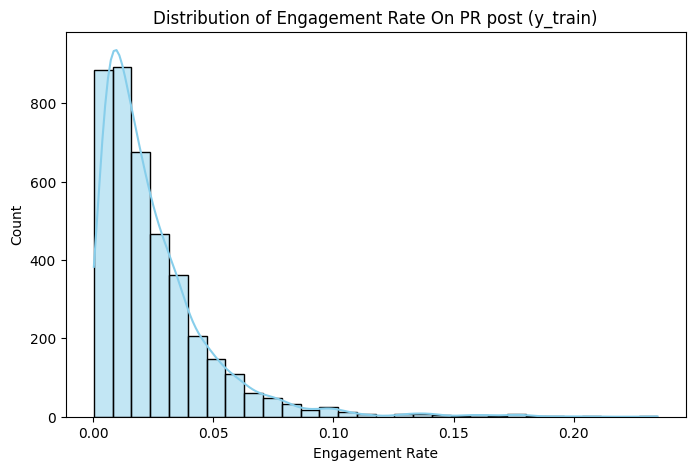

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Engagement Rate On PR post (y_train)")
plt.xlabel("Engagement Rate")
plt.ylabel("Count")
plt.show()

In [229]:
# Chạy mô hình Mean Predictor
run_mean_predictor(X_train, X_test, y_train, y_test)

📊 Đánh giá mô hình:
RMSLE: 0.0271
RMSE: 0.0300
R²: -0.0004
MAE: 0.0179
Mean target: 0.0255
MAE / mean target: 70.01%


np.float64(0.02489891875364567)

In [230]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3988 entries, 5679 to 3332
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   musicId                      3988 non-null   float64
 1   duration                     3988 non-null   int64  
 2   isSlideshow                  3988 non-null   bool   
 3   isSponsored                  3988 non-null   bool   
 4   ttSeller                     3988 non-null   bool   
 5   commerceUser                 3988 non-null   bool   
 6   is_trending                  3988 non-null   bool   
 7   emoji_count                  3988 non-null   int64  
 8   hashtag_count                3988 non-null   int64  
 9   word_count_no_emoji_hashtag  3988 non-null   int64  
 10  is_weekend                   3988 non-null   int64  
 11  createMonth                  3988 non-null   int32  
 12  time_of_day                  3988 non-null   int64  
dtypes: bool(5), float64(

In [231]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 5914 to 12373
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   musicId                      997 non-null    float64
 1   duration                     997 non-null    int64  
 2   isSlideshow                  997 non-null    bool   
 3   isSponsored                  997 non-null    bool   
 4   ttSeller                     997 non-null    bool   
 5   commerceUser                 997 non-null    bool   
 6   is_trending                  997 non-null    bool   
 7   emoji_count                  997 non-null    int64  
 8   hashtag_count                997 non-null    int64  
 9   word_count_no_emoji_hashtag  997 non-null    int64  
 10  is_weekend                   997 non-null    int64  
 11  createMonth                  997 non-null    int32  
 12  time_of_day                  997 non-null    int64  
dtypes: bool(5), float64(

# Data for linear model 

In [269]:
X_linear = X.copy()
for col in bool_features:
    X_linear[col] = X_linear[col].astype(int)

# ---- Count Encode categorical ----
for col in cat_features:
        counts = X_linear[col].astype(str).value_counts()
        X_linear[col] = X_linear[col].astype(str).map(counts).fillna(0)

X_train_linear, X_test_linear, y_train_linear, y_test_linear = split_data(X_linear, y)
scaler = StandardScaler()
X_train_linear_standard = scaler.fit_transform(X_train_linear)
X_test_linear_standard = scaler.transform(X_test_linear)

In [306]:
X_linear.head()

,musicId,duration,isSlideshow,isSponsored,ttSeller,commerceUser,is_trending,emoji_count,hashtag_count,word_count_no_emoji_hashtag,is_weekend,createMonth,time_of_day
11,36,47,0,0,0,0,0,2,7,10,0,6,3
12,36,83,0,0,0,0,0,0,7,17,0,6,1
22,36,66,0,0,0,0,0,1,6,10,1,5,3
36,5,47,0,0,0,0,0,0,8,12,1,5,3
40,5,89,0,0,0,0,0,1,10,7,0,5,3


In [307]:
type(X_train_linear_standard)

numpy.ndarray

## Linear Regression 

In [271]:
from sklearn.linear_model import LinearRegression
def evaluate_linear_regression(X_train, y_train, X_test, y_test):
    # Log-transform target để giảm skew
    y_train_log = np.log1p(y_train)  

    # Train model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train_log)
    
    evaluate_model_log_target(model, X_test, y_test)

    return model

In [272]:
# Gọi lại hàm evaluate_linear_regression với dữ liệu đã gộp
model = evaluate_linear_regression(
    X_train_linear_standard, 
    y_train_linear, 
    X_test_linear_standard, 
    y_test_linear
)

📊 Đánh giá mô hình:
RMSLE: 0.0264
RMSE: 0.0293
R²: 0.0415
MAE: 0.0167
Mean target: 0.0255
MAE / mean target: 65.51%


## Ridge Regression 

In [308]:
def rmsle_log_targets(y_true, y_pred):
    # y_true và y_pred đã là log1p(target), không log lại
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_log_targets, greater_is_better=True)


def optimize_and_run_ridge(X_train, X_test, y_train, y_test, n_trials=100):
    y_train_log = np.log1p(y_train)

    def objective(trial):
        alpha = trial.suggest_float("alpha", 1e-4, 1e3, log=True)
        model = Ridge(alpha=alpha)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train_log, cv=kf, scoring=rmsle_scorer, n_jobs=-1)
        return scores.mean()

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model trên toàn bộ train
    best_model = Ridge(alpha=study.best_params["alpha"])
    best_model.fit(X_train, y_train_log)

    # Đánh giá trên test
    evaluate_model_log_target(best_model, X_test, y_test)

    return best_model

In [309]:
ridge_model = optimize_and_run_ridge(
    X_train_linear_standard, 
    X_test_linear_standard, 
    y_train_linear,
    y_test_linear,
    100
)

[I 2025-08-26 13:56:11,195] A new study created in memory with name: no-name-b4bcfe71-44b3-46f2-b486-bffe0e96e133
[I 2025-08-26 13:56:15,944] Trial 0 finished with value: 0.02190570378967786 and parameters: {'alpha': 0.003841598894561104}. Best is trial 0 with value: 0.02190570378967786.
[I 2025-08-26 13:56:18,138] Trial 1 finished with value: 0.021905703883150697 and parameters: {'alpha': 0.0009059572494167433}. Best is trial 0 with value: 0.02190570378967786.
[I 2025-08-26 13:56:18,187] Trial 2 finished with value: 0.021905703305249442 and parameters: {'alpha': 0.019056471687762786}. Best is trial 2 with value: 0.021905703305249442.
[I 2025-08-26 13:56:18,238] Trial 3 finished with value: 0.021904408713999495 and parameters: {'alpha': 46.20229011183212}. Best is trial 3 with value: 0.021904408713999495.
[I 2025-08-26 13:56:18,277] Trial 4 finished with value: 0.021905703518216853 and parameters: {'alpha': 0.01236746263569672}. Best is trial 3 with value: 0.021904408713999495.
[I 2025

Best hyperparameters: {'alpha': 233.26383496043195}
Best CV score: 0.021902222189927815
📊 Đánh giá mô hình:
RMSLE: 0.0264
RMSE: 0.0293
R²: 0.0408
MAE: 0.0167
Mean target: 0.0255
MAE / mean target: 65.61%


## Lasso Regression 

In [310]:
from sklearn.linear_model import Lasso
def optimize_and_run_lasso(X_train, X_test, y_train, y_test, n_trials=100):
    # Log-transform target
    y_train_log = np.log1p(y_train)

    # Hàm objective cho Optuna
    def objective(trial):
        alpha = trial.suggest_float("alpha", 1e-4, 1e3, log=True)
        model = Lasso(alpha=alpha, random_state=42)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train_log, cv=kf, scoring=rmsle_scorer, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    # Tạo study và chạy tối ưu
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model trên toàn bộ train
    best_model = Lasso(alpha=study.best_params["alpha"], random_state=42)
    best_model.fit(X_train, y_train_log)

    # Đánh giá trên test
    evaluate_model_log_target(best_model, X_test, y_test)

    return best_model

In [311]:
ridge_model = optimize_and_run_lasso(
    X_train_linear_standard, 
    X_test_linear_standard, 
    y_train_linear,
    y_test_linear,
    100
)

[I 2025-08-26 13:56:35,119] A new study created in memory with name: no-name-be1bd539-cfdd-477c-80be-4fe67581f357
[I 2025-08-26 13:56:35,190] Trial 0 finished with value: 0.02246394090942616 and parameters: {'alpha': 871.7552141793028}. Best is trial 0 with value: 0.02246394090942616.
[I 2025-08-26 13:56:35,247] Trial 1 finished with value: 0.02246394090942616 and parameters: {'alpha': 3.168308839413118}. Best is trial 0 with value: 0.02246394090942616.
[I 2025-08-26 13:56:35,317] Trial 2 finished with value: 0.02246394090942616 and parameters: {'alpha': 0.014625570614558329}. Best is trial 0 with value: 0.02246394090942616.
[I 2025-08-26 13:56:35,357] Trial 3 finished with value: 0.02246394090942616 and parameters: {'alpha': 29.05351784792118}. Best is trial 0 with value: 0.02246394090942616.
[I 2025-08-26 13:56:35,403] Trial 4 finished with value: 0.02246394090942616 and parameters: {'alpha': 24.100992044011974}. Best is trial 0 with value: 0.02246394090942616.
[I 2025-08-26 13:56:35

Best hyperparameters: {'alpha': 0.0001499953111101726}
Best CV score: 0.021894126137441516
📊 Đánh giá mô hình:
RMSLE: 0.0264
RMSE: 0.0293
R²: 0.0403
MAE: 0.0167
Mean target: 0.0255
MAE / mean target: 65.63%


## SVR

In [312]:
from sklearn.svm import SVR
def optimize_and_run_svr(X_train, X_test, y_train, y_test, n_trials=100, kernel='rbf'):
    # Log-transform target
    y_train_log = np.log1p(y_train)

    # Objective function cho Optuna
    def objective(trial):
        C = trial.suggest_float("C", 0.1, 1000.0, log=True)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0, log=True)
        gamma = trial.suggest_categorical("gamma", ['scale', 'auto'])
        
        model = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)
        
        # 5-fold cross-validation trên train
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train_log, cv=kf, scoring=rmsle_scorer, n_jobs=-1)
        return scores.mean()  # Optuna sẽ minimize

    # Tạo study và optimize
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model trên toàn bộ train
    best_model = SVR(
        kernel=kernel,
        C=study.best_params["C"],
        epsilon=study.best_params["epsilon"],
        gamma=study.best_params["gamma"]
    )
    best_model.fit(X_train, y_train_log)

    # Đánh giá trên test
    evaluate_model_log_target(best_model, X_test, y_test)

    return best_model

In [315]:
ridge_model = optimize_and_run_svr(
    X_train_linear_standard, 
    X_test_linear_standard, 
    y_train_linear,
    y_test_linear,
    100
)

[I 2025-08-26 13:58:46,161] A new study created in memory with name: no-name-bdb30992-2839-451d-82c5-592383a7985a
[I 2025-08-26 13:58:50,497] Trial 0 finished with value: 0.027051256216404362 and parameters: {'C': 13.12981287739553, 'epsilon': 0.0132616610922363, 'gamma': 'scale'}. Best is trial 0 with value: 0.027051256216404362.
[I 2025-08-26 13:58:50,538] Trial 1 finished with value: 0.08113076787043645 and parameters: {'C': 222.57396044608944, 'epsilon': 0.2627376097678646, 'gamma': 'scale'}. Best is trial 0 with value: 0.027051256216404362.
[I 2025-08-26 13:58:50,570] Trial 2 finished with value: 0.08113076787043645 and parameters: {'C': 168.2987997861418, 'epsilon': 0.9895887325572343, 'gamma': 'auto'}. Best is trial 0 with value: 0.027051256216404362.
[I 2025-08-26 13:58:51,080] Trial 3 finished with value: 0.022443334005745393 and parameters: {'C': 0.43894977596639956, 'epsilon': 0.018653056964759232, 'gamma': 'auto'}. Best is trial 3 with value: 0.022443334005745393.
[I 2025-0

Best hyperparameters: {'C': 0.10588126923874246, 'epsilon': 0.012850709957407868, 'gamma': 'scale'}
Best CV score: 0.02181751024356727
📊 Đánh giá mô hình:
RMSLE: 0.0263
RMSE: 0.0292
R²: 0.0471
MAE: 0.0160
Mean target: 0.0255
MAE / mean target: 62.80%


# Data for base-tree models

## Except CatBoost

In [316]:
X_tree_encode = X.copy()
for col in bool_features:
    X_tree_encode[col] = X_tree_encode[col].astype(int)

# ---- Count Encode categorical ----
for col in cat_features:
    counts = X_tree_encode[col].astype(str).value_counts()
    X_tree_encode[col] = X_tree_encode[col].astype(str).map(counts).fillna(0)

X_train_tree_encode, X_test_tree_encode, y_train_tree, y_test_tree = split_data(X_tree_encode, y)

In [317]:
X_tree_encode.head()

,musicId,duration,isSlideshow,isSponsored,ttSeller,commerceUser,is_trending,emoji_count,hashtag_count,word_count_no_emoji_hashtag,is_weekend,createMonth,time_of_day
11,36,47,0,0,0,0,0,2,7,10,0,6,3
12,36,83,0,0,0,0,0,0,7,17,0,6,1
22,36,66,0,0,0,0,0,1,6,10,1,5,3
36,5,47,0,0,0,0,0,0,8,12,1,5,3
40,5,89,0,0,0,0,0,1,10,7,0,5,3


In [318]:
X.isnull().sum()

musicId                        0
duration                       0
isSlideshow                    0
isSponsored                    0
ttSeller                       0
commerceUser                   0
is_trending                    0
emoji_count                    0
hashtag_count                  0
word_count_no_emoji_hashtag    0
is_weekend                     0
createMonth                    0
time_of_day                    0
dtype: int64

## Random Forest 

In [319]:
def rmsle_original_target(y_true, y_pred):
    # y_true và y_pred là giá trị gốc, không log-transform
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

rmsle_scorer_original = make_scorer(rmsle_original_target, greater_is_better=True)

In [320]:
def evaluate_model_non_log_target(model, X_test, y_test): # y_test lúc này là scale gốc
    # Dự đoán trên thang đo log
    y_pred = model.predict(X_test)
    
    # Tính toán các chỉ số
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mean_target = y_test.mean()
    
    print("📊 Đánh giá mô hình:")
    print(f"RMSLE: {rmsle:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Mean target: {mean_target:.4f}")
    print(f"MAE / mean target: {mae / mean_target:.2%}")
    
    return y_pred

In [321]:
from sklearn.ensemble import RandomForestRegressor

def optimize_and_run_random_forest_fast(X_train, X_test, y_train, y_test, n_trials=50):
    """
    RandomForest baseline optimization với Optuna nhanh.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    """
    def objective(trial):
        # Search space rút gọn
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 8),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'random_state': 42,
            'n_jobs': -1
        }

        model = RandomForestRegressor(**params)

        kf = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold CV nhanh
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmsle_scorer_original, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model
    best_model = RandomForestRegressor(**study.best_params)
    best_model.fit(X_train, y_train)

    # Đánh giá trên test
    evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model

In [324]:
model_rf = optimize_and_run_random_forest_full(
    X_train_tree_encode, 
    X_test_tree_encode, 
    y_train_tree, 
    y_test_tree,
    5
)

[I 2025-08-26 14:23:53,536] A new study created in memory with name: no-name-bc7b570b-1e2f-4ae8-9554-6fe9f4371ba6


[I 2025-08-26 14:24:06,353] Trial 0 finished with value: 0.02134050093770915 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.02134050093770915.
[I 2025-08-26 14:24:46,402] Trial 1 finished with value: 0.022432925284153898 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'absolute_error'}. Best is trial 0 with value: 0.02134050093770915.
[I 2025-08-26 14:24:49,808] Trial 2 finished with value: 0.021333243842214192 and parameters: {'n_estimators': 600, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'squared_error'}. Best is trial 2 with value: 0.021333243842214192.
[I 2025-08-26 14:27:25,849] Trial 3 finished with value: 0.02260974279036166 and paramet

Best hyperparameters: {'n_estimators': 600, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'squared_error'}
Best CV score: 0.021333243842214192
📊 Đánh giá mô hình:
RMSLE: 0.0258
RMSE: 0.0288
R²: 0.0762
MAE: 0.0160
Mean target: 0.0255
MAE / mean target: 62.74%


## XGBoost 

In [325]:
from xgboost import XGBRegressor

def optimize_and_run_XGBoost(X_train, X_test, y_train, y_test, n_trials=50):
    """
    RandomForest baseline optimization với Optuna nhanh.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    """
    def objective(trial):
        # Search space rút gọn
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),             
            'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),           
            'max_depth': trial.suggest_int('max_depth', 3, 10),                             
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 3),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0, log=True),
            'random_state': 42,
            'n_jobs': -1,
            'tree_method': 'hist',
            'objective': 'reg:squarederror'
        }

        model = XGBRegressor(**params)

        kf = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold CV nhanh
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmsle_scorer_original, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model
    best_model = XGBRegressor(**study.best_params)
    best_model.fit(X_train, y_train)

    # Đánh giá trên test
    evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model

In [328]:
model_xgb = optimize_and_run_XGBoost(
    X_train_tree_encode, 
    X_test_tree_encode, 
    y_train_tree, 
    y_test_tree,
    100
)

[I 2025-08-26 14:33:29,146] A new study created in memory with name: no-name-b866d78f-ffdc-48f0-b16a-8020651c566e
[I 2025-08-26 14:33:32,853] Trial 0 finished with value: 0.022482724540960414 and parameters: {'learning_rate': 0.03369668205315831, 'n_estimators': 200, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.9589048014149102, 'colsample_bytree': 0.8999175109413032, 'gamma': 2.195596453297446, 'reg_alpha': 0.20467021640702807, 'reg_lambda': 0.0034898691290797417}. Best is trial 0 with value: 0.022482724540960414.
[I 2025-08-26 14:33:35,481] Trial 1 finished with value: 0.02248336287133058 and parameters: {'learning_rate': 0.02920659456672571, 'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.7790378024285396, 'colsample_bytree': 0.7864452259194215, 'gamma': 1.53479990395365, 'reg_alpha': 0.004973107515814191, 'reg_lambda': 0.09213155634346673}. Best is trial 0 with value: 0.022482724540960414.
[I 2025-08-26 14:33:37,885] Trial 2 finished with value:

Best hyperparameters: {'learning_rate': 0.07249099940420281, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.7064921774623574, 'colsample_bytree': 0.9170201598642003, 'gamma': 0.0021350279157578943, 'reg_alpha': 0.001970570791589569, 'reg_lambda': 0.08423348130268533}
Best CV score: 0.021631298873554083
📊 Đánh giá mô hình:
RMSLE: 0.0259
RMSE: 0.0288
R²: 0.0754
MAE: 0.0161
Mean target: 0.0255
MAE / mean target: 63.21%


## LightGBM

In [337]:
from lightgbm import LGBMRegressor

def optimize_and_run_LightGBM(X_train, X_test, y_train, y_test, n_trials=50):
    """
    RandomForest baseline optimization với Optuna nhanh.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    """
    def objective(trial):
        # Search space rút gọn
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08),
            'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0, log=True),
            'random_state': 42,
            'n_jobs': -1
        }

        model = LGBMRegressor(**params, verbose=-1)

        kf = KFold(n_splits=4, shuffle=True, random_state=42)  # 3-fold CV nhanh
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmsle_scorer_original, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model
    best_model = LGBMRegressor(**study.best_params, verbose=-1)
    best_model.fit(X_train, y_train)

    # Đánh giá trên test
    evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model

In [339]:
model_lightGBM = optimize_and_run_LightGBM(
    X_train_tree_encode, 
    X_test_tree_encode, 
    y_train_tree, 
    y_test_tree,
    50
)

[I 2025-08-26 14:46:21,011] A new study created in memory with name: no-name-e1d23efe-8ab5-45df-849a-317fa5b0f421


[I 2025-08-26 14:46:33,939] Trial 0 finished with value: 0.022379946669288865 and parameters: {'learning_rate': 0.06815572850233192, 'n_estimators': 500, 'max_depth': 10, 'num_leaves': 46, 'min_child_samples': 81, 'subsample': 0.84733833630933, 'colsample_bytree': 0.7103034011426859, 'reg_alpha': 0.06110608848261731, 'reg_lambda': 0.04605284649232929}. Best is trial 0 with value: 0.022379946669288865.
[I 2025-08-26 14:46:37,231] Trial 1 finished with value: 0.02168641238424407 and parameters: {'learning_rate': 0.06589737939803118, 'n_estimators': 200, 'max_depth': 5, 'num_leaves': 55, 'min_child_samples': 85, 'subsample': 0.8485607107879864, 'colsample_bytree': 0.7355682337602174, 'reg_alpha': 0.2810116553248774, 'reg_lambda': 0.055883297647789}. Best is trial 1 with value: 0.02168641238424407.
[I 2025-08-26 14:46:39,968] Trial 2 finished with value: 0.021642640822597498 and parameters: {'learning_rate': 0.0616546553350115, 'n_estimators': 100, 'max_depth': 10, 'num_leaves': 15, 'min_c

Best hyperparameters: {'learning_rate': 0.027698767302731662, 'n_estimators': 100, 'max_depth': 8, 'num_leaves': 30, 'min_child_samples': 20, 'subsample': 0.8591352933447484, 'colsample_bytree': 0.9234134042969673, 'reg_alpha': 0.0029777506949415326, 'reg_lambda': 0.001856968340487002}
Best CV score: 0.021519797834859716
📊 Đánh giá mô hình:
RMSLE: 0.0260
RMSE: 0.0289
R²: 0.0683
MAE: 0.0161
Mean target: 0.0255
MAE / mean target: 63.21%


## ExtraTreesRegressor

In [343]:
from sklearn.ensemble import ExtraTreesRegressor

def optimize_and_run_ExtraTreesRegressor(X_train, X_test, y_train, y_test, n_trials=50):
    """
    RandomForest baseline optimization với Optuna nhanh.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    """
    def objective(trial):
        # Search space rút gọn
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 8),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'random_state': 42,
            'n_jobs': -1
        }

        model = ExtraTreesRegressor(**params)

        kf = KFold(n_splits=4, shuffle=True, random_state=42)  # 3-fold CV nhanh
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmsle_scorer_original, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model
    best_model = ExtraTreesRegressor(**study.best_params)
    best_model.fit(X_train, y_train)

    # Đánh giá trên test
    evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model

In [345]:
model_ETR = optimize_and_run_ExtraTreesRegressor(
    X_train_tree_encode, 
    X_test_tree_encode, 
    y_train_tree, 
    y_test_tree,
    100
)

[I 2025-08-26 14:55:07,987] A new study created in memory with name: no-name-305015f8-28ff-4f16-b131-a0ac6afe8e0b
[I 2025-08-26 14:55:11,754] Trial 0 finished with value: 0.02181035240162423 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.02181035240162423.
[I 2025-08-26 14:55:14,680] Trial 1 finished with value: 0.02172807889437108 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.02172807889437108.
[I 2025-08-26 14:55:15,337] Trial 2 finished with value: 0.021569628139974366 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.021569628139974366.
[I 2025-08-26 14:55:15,868] Trial 3 finished with value: 0.02154780865

Best hyperparameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
Best CV score: 0.021376623204747994
📊 Đánh giá mô hình:
RMSLE: 0.0260
RMSE: 0.0289
R²: 0.0689
MAE: 0.0163
Mean target: 0.0255
MAE / mean target: 63.82%


## Hist Gradient Boosting

In [347]:
from sklearn.ensemble import HistGradientBoostingRegressor

def optimize_and_run_HistGradientBoostingRegressor(X_train, X_test, y_train, y_test, n_trials=50):
    """
    RandomForest baseline optimization với Optuna nhanh.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    """
    def objective(trial):
        # Search space rút gọn
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08),
            'max_iter': trial.suggest_int('max_iter', 100, 500, step=50),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 40),
            'l2_regularization': trial.suggest_float('l2_regularization', 1e-3, 1.0, log=True),
            'early_stopping': False,
            'random_state': 42
        }

        model = HistGradientBoostingRegressor(**params)

        kf = KFold(n_splits=4, shuffle=True, random_state=42)  # 3-fold CV nhanh
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmsle_scorer_original, n_jobs=-1)
        return scores.mean()  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model
    best_model = HistGradientBoostingRegressor(**study.best_params)
    best_model.fit(X_train, y_train)

    # Đánh giá trên test
    evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model

In [348]:
model_HGD = optimize_and_run_HistGradientBoostingRegressor(
    X_train_tree_encode, 
    X_test_tree_encode, 
    y_train_tree, 
    y_test_tree,
    100
)

[I 2025-08-26 14:59:52,791] A new study created in memory with name: no-name-e8ee97c8-b772-49f2-8ec4-98e3e4f0a616
[I 2025-08-26 14:59:53,880] Trial 0 finished with value: 0.02166039409139554 and parameters: {'learning_rate': 0.042533513292367, 'max_iter': 200, 'max_depth': 4, 'min_samples_leaf': 38, 'l2_regularization': 0.11407513902501192}. Best is trial 0 with value: 0.02166039409139554.
[I 2025-08-26 14:59:54,319] Trial 1 finished with value: 0.02158499819432877 and parameters: {'learning_rate': 0.02207862201421248, 'max_iter': 100, 'max_depth': 7, 'min_samples_leaf': 10, 'l2_regularization': 0.9286663554419947}. Best is trial 1 with value: 0.02158499819432877.
[I 2025-08-26 14:59:55,129] Trial 2 finished with value: 0.022265780893036657 and parameters: {'learning_rate': 0.051000180178431276, 'max_iter': 450, 'max_depth': 5, 'min_samples_leaf': 11, 'l2_regularization': 0.5038235773004681}. Best is trial 1 with value: 0.02158499819432877.
[I 2025-08-26 14:59:56,062] Trial 3 finished 

Best hyperparameters: {'learning_rate': 0.028507581294473037, 'max_iter': 100, 'max_depth': 7, 'min_samples_leaf': 17, 'l2_regularization': 0.0019770381177117062}
Best CV score: 0.021507485905898356
📊 Đánh giá mô hình:
RMSLE: 0.0260
RMSE: 0.0289
R²: 0.0673
MAE: 0.0162
Mean target: 0.0255
MAE / mean target: 63.42%


---
## CatBoost

In [349]:
con_features = ['time_of_day', 'duration', 'emoji_count', 'hashtag_count', 'word_count_no_emoji_hashtag', 'createMonth']
bool_features = ['isSlideshow', 'isSponsored', 'ttSeller', 'commerceUser', 'is_trending', 'is_weekend']
cat_features = ['musicId']

In [350]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4985 entries, 11 to 22750
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   musicId                      4985 non-null   float64
 1   duration                     4985 non-null   int64  
 2   isSlideshow                  4985 non-null   bool   
 3   isSponsored                  4985 non-null   bool   
 4   ttSeller                     4985 non-null   bool   
 5   commerceUser                 4985 non-null   bool   
 6   is_trending                  4985 non-null   bool   
 7   emoji_count                  4985 non-null   int64  
 8   hashtag_count                4985 non-null   int64  
 9   word_count_no_emoji_hashtag  4985 non-null   int64  
 10  is_weekend                   4985 non-null   int64  
 11  createMonth                  4985 non-null   int32  
 12  time_of_day                  4985 non-null   int64  
dtypes: bool(5), float64(1

In [351]:
y.info()

<class 'pandas.core.series.Series'>
Index: 4985 entries, 11 to 22750
Series name: Engagement Rate
Non-Null Count  Dtype  
--------------  -----  
4985 non-null   float64
dtypes: float64(1)
memory usage: 77.9 KB


In [352]:
X.isnull().sum()

musicId                        0
duration                       0
isSlideshow                    0
isSponsored                    0
ttSeller                       0
commerceUser                   0
is_trending                    0
emoji_count                    0
hashtag_count                  0
word_count_no_emoji_hashtag    0
is_weekend                     0
createMonth                    0
time_of_day                    0
dtype: int64

In [358]:
X_cat = X.copy() 
X_cat[cat_features] = X_cat[cat_features].astype(str)

X_train_cat, X_test_cat, y_train, y_test = split_data(X_tree_encode, y)

In [ ]:
from catboost import CatBoostRegressor

def optimize_and_run_CatBoost(X_train, X_test, y_train, y_test, cat_features, n_trials=50):
    """
    CatBoostRegressor optimization với Optuna.
    Search space nhỏ để giảm thời gian train.
    CV: 3-fold, RMSLE.
    cat_features: list of column names categorical
    """
    def objective(trial):
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08),
            'depth': trial.suggest_int('depth', 3, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
            'border_count': trial.suggest_int('border_count', 32, 255),
            'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
            'iterations': trial.suggest_int('iterations', 200, 1000, step=100),
            'random_state': 42,
            'verbose': 0
        }

        model = CatBoostRegressor(**params)

        kf = KFold(n_splits=4, shuffle=True, random_state=42)
        scores = []
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            model.fit(X_tr, y_tr, cat_features=cat_features, eval_set=(X_val, y_val), verbose=0)
            y_pred = model.predict(X_val)
            rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))
            scores.append(rmsle)
        
        return np.mean(scores)  # minimize RMSLE

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Best hyperparameters:", study.best_params)
    print("Best CV score:", study.best_value)

    # Train final model trên toàn bộ X_train
    best_model = CatBoostRegressor(**study.best_params)
    best_model.fit(X_train, y_train, cat_features=cat_features, verbose=0)

    # Đánh giá trên test
    y_pred_test = evaluate_model_non_log_target(best_model, X_test, y_test)

    return best_model


In [360]:
model_cat = optimize_and_run_CatBoost(
    X_train_cat, 
    X_test_cat, 
    y_train, 
    y_test,
    cat_features,
    100
)

[I 2025-08-26 15:29:45,458] A new study created in memory with name: no-name-062ff45f-50ee-4d81-a471-e2a2277cc04b
[I 2025-08-26 15:29:48,304] Trial 0 finished with value: 0.021530915263484853 and parameters: {'learning_rate': 0.02255060258966419, 'depth': 5, 'l2_leaf_reg': 2.687099790383248, 'bagging_temperature': 0.24922903561519427, 'border_count': 172, 'random_strength': 0.07199678049703695, 'iterations': 900}. Best is trial 0 with value: 0.021530915263484853.
[I 2025-08-26 15:29:49,197] Trial 1 finished with value: 0.021571989021060792 and parameters: {'learning_rate': 0.07018079061772979, 'depth': 4, 'l2_leaf_reg': 0.002410930552637411, 'bagging_temperature': 0.4371255953789124, 'border_count': 237, 'random_strength': 0.9128007930736893, 'iterations': 300}. Best is trial 0 with value: 0.021530915263484853.
[I 2025-08-26 15:29:54,665] Trial 2 finished with value: 0.021549847544868217 and parameters: {'learning_rate': 0.06716676511486253, 'depth': 7, 'l2_leaf_reg': 0.481960212569721

Best hyperparameters: {'learning_rate': 0.025040213976564002, 'depth': 7, 'l2_leaf_reg': 0.022017079475251108, 'bagging_temperature': 0.771455904795042, 'border_count': 138, 'random_strength': 0.4614848355710919, 'iterations': 500}
Best CV score: 0.021415579674916155
📊 Đánh giá mô hình:
RMSLE: 0.0259
RMSE: 0.0288
R²: 0.0755
MAE: 0.0159
Mean target: 0.0255
MAE / mean target: 62.49%
